In [1]:
from FastFitClassifier import FastFitClassifier
import pandas as pd
from tqdm.auto import tqdm

tqdm.pandas()

In [2]:
DEV = True
model_path = "./models/relevance/avsolatorio/GIST-small-Embedding-v0"
# model_path = './models/relevance/avsolatorio/GIST-Embedding-v0'


if DEV:
    model_path=model_path.replace('relevance', 'relevance/dev')
else:
    model_path = model_path.replace('-small','')

In [3]:
def import_labelled_data(path="data/level-1.5/potential/data.json"):
    data = pd.read_json(path, encoding="latin-1")
    return data



print("Loading data...")

test_dataset = import_labelled_data(path="../../../data/level-1.5/potential/dev/data.json", )


print("Data loaded.")

if DEV:
    test_dataset = test_dataset.sample(min(5000,len(test_dataset)))

test_dataset = test_dataset.sample(frac=1).reset_index(drop=True)


test_dataset.info()

Loading data...
Data loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           167 non-null    object 
 1   text          167 non-null    object 
 2   relevance     167 non-null    object 
 3   multiclasses  167 non-null    object 
 4   predictions   167 non-null    object 
 5   score-lv1     167 non-null    float64
dtypes: float64(1), object(5)
memory usage: 8.0+ KB


In [4]:
test_dataset.head()

,url,text,relevance,multiclasses,predictions,score-lv1
0,https://www.wppcinc.org/uploads/3/8/0/4/380435...,Impact of proposed Port of Hastings expansion ...,irrelevant,[],relevant,1.0
1,http://xerces.org/sites/default/files/publicat...,Nesting & Overwintering Habitat FOR POLLINATOR...,irrelevant,[],relevant,1.0
2,https://cms.zsl.org/sites/default/files/2022-1...,W Stefanie Deinet I L D Christina Ieronymidou ...,irrelevant,[],relevant,1.0
3,https://digitalarchive.worldfishcenter.org/bit...,Partnership for Aquaculture Development in Tim...,irrelevant,[],relevant,1.0
4,https://www.worldlandtrust.org/wp-content/uplo...,Saving Borneo’s Orangutan Corridors The latest...,irrelevant,[],relevant,1.0


In [5]:
import torch
torch.cuda.empty_cache()

In [6]:
classifier = FastFitClassifier(
    model_path=model_path,
    text_overlap_proportion=0.2,
    device='cuda'
)

Loading model from ./models/relevance/dev/avsolatorio/GIST-small-Embedding-v0 ...
Model loaded.
Tokenizer loaded....


The model 'FastFit' is not supported for text-classification. Supported models are ['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'BigBirdPegasusForSequenceClassification', 'BioGptForSequenceClassification', 'BloomForSequenceClassification', 'CamembertForSequenceClassification', 'CanineForSequenceClassification', 'LlamaForSequenceClassification', 'ConvBertForSequenceClassification', 'CTRLForSequenceClassification', 'Data2VecTextForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'DistilBertForSequenceClassification', 'ElectraForSequenceClassification', 'ErnieForSequenceClassification', 'ErnieMForSequenceClassification', 'EsmForSequenceClassification', 'FalconForSequenceClassification', 'FlaubertForSequenceClassification', 'FNetForSequenceClassification', 'FunnelForSequenceClassification', 'GemmaForSequenceClassification', 'Gemma2ForSequenceClassif


Classifier pipeline built.


  0%|          | 0/167 [00:00<?, ?it/s]

Data chunked.


Files	:   0%|          | 0/167 [00:00<?, ?it/s]

Chunks	:   0%|          | 0/34234 [00:00<?, ?it/s]

Calculated predictions.
Evaluating model...

-----------------------------------------------------

Classification Report: 
              precision    recall  f1-score   support

  irrelevant       1.00      0.99      0.99       167
    relevant       0.00      0.00      0.00         0

    accuracy                           0.99       167
   macro avg       0.50      0.49      0.50       167
weighted avg       1.00      0.99      0.99       167

-----------------------------------------------------
Accuracy: 0.98802
Precision: 0.5
Specificity: 0.98802


/workspace/GreyLit/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/GreyLit/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/GreyLit/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


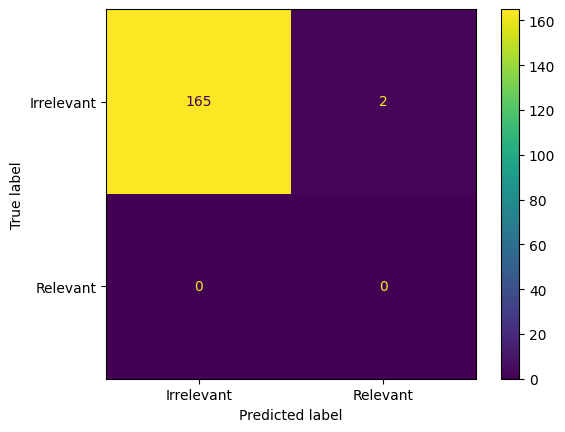

In [7]:

#! on fastfit/modeling.py, line 838, inserting **kwargs to the function arguments
#! it's easier to just silently accept and not use extra tokenizer return values
#! than getting it to stop outputting things like token_type_ids

predicted_data = classifier.evaluate(
    test_dataset,
    metrics=[
        "accuracy",
        "precision",
        "classification-report",
        "specificity",
        "confusion-matrix-mpl",
    ],
    aggregate="majority",

)

In [8]:
potential = predicted_data[predicted_data["predictions"] == "relevant"]
potential = potential.sort_values(by="score-lv2", ascending=False)


In [9]:
predicted_data.sort_values(by="score-lv2", ascending=False)['url']
predicted_data.head(10)

,url,text,relevance,multiclasses,predictions,score-lv1,score-lv2
0,https://www.wppcinc.org/uploads/3/8/0/4/380435...,Impact of proposed Port of Hastings expansion ...,irrelevant,[],irrelevant,1.0,0.995811
1,http://xerces.org/sites/default/files/publicat...,Nesting & Overwintering Habitat FOR POLLINATOR...,irrelevant,[],irrelevant,1.0,1.000000
2,https://cms.zsl.org/sites/default/files/2022-1...,W Stefanie Deinet I L D Christina Ieronymidou ...,irrelevant,[],irrelevant,1.0,0.996987
3,https://digitalarchive.worldfishcenter.org/bit...,Partnership for Aquaculture Development in Tim...,irrelevant,[],irrelevant,1.0,1.000000
4,https://www.worldlandtrust.org/wp-content/uplo...,Saving Borneo’s Orangutan Corridors The latest...,irrelevant,[],irrelevant,1.0,1.000000
5,https://www.worthingarchaeological.org/uploads...,News sheet June – July 2019 submitted to the N...,irrelevant,[],irrelevant,1.0,0.999996
6,https://yearofthesalmon.org/wp-content/uploads...,Conserving salmon at the southern end of their...,irrelevant,[],irrelevant,1.0,1.000000
7,http://xerces.org/sites/default/files/19-053_B...,PROTECTING POLLINATORS FROM PESTICIDES Buying ...,irrelevant,[],irrelevant,1.0,1.000000
8,https://zenodo.org/records/7920766/files/Europ...,Synthesis Report on the Environmental Impacts ...,irrelevant,[],irrelevant,1.0,0.997005
9,https://yearofthesalmon.org/wp-content/uploads...,Supplementary stocking selects for domesticate...,irrelevant,[],irrelevant,1.0,1.000000


In [10]:
potential.head()

,url,text,relevance,multiclasses,predictions,score-lv1,score-lv2
38,https://zenodo.org/records/1160658/files/Full-...,th Full-length huntingtin Q23 expression and p...,irrelevant,[],relevant,1.0,1.000000
159,http://makir.mak.ac.ug/bitstream/handle/10570/...,Real-Time Imaging of the Intracellular Glutath...,irrelevant,[],relevant,1.0,0.987162


In [11]:

if DEV:
    from os import makedirs, path
    if not path.exists("../../../data/level-2.5/potential/dev"):
        makedirs("../../../data/level-2.5/potential/dev")
    potential.to_json("../../../data/level-2.5/potential/dev/data.json", orient="records", indent=4)
else:
    potential.to_json("../../../data/level-2.5/potential/data.json", orient="records", indent=4)

In [12]:
with pd.option_context('display.max_colwidth', 400):
    print(potential['url'])

38     https://zenodo.org/records/1160658/files/Full-length%20huntingtin%20Q23%20expression%20and%20purification%20%E2%80%93%2025th%20January%202018%20.pdf?download=1
159                                                             http://makir.mak.ac.ug/bitstream/handle/10570/2127/kasozi-mohring-conas-res.pdf?sequence=1&isAllowed=y
Name: url, dtype: object
